
## Introduction:

**Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal**
<br/>
The topic we will explore is about factors that may cause a stroke. We choose this topic because according to World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. Every year, this number increases dramatically, especially among people over the age of 70. But a lot of strokes are avoidable, so we'll explore what symptoms a patient has when they mean they're at high risk for stroke.


**Clearly state the question you will try to answer with your project**
<br/>
The question we try to solve is predictive: Can we use the stroke dataset measurements to predict whether a future patient (with unknown diagnosis) shows a high tendency of having a stroke or not?

**Identify and describe the dataset that will be used to answer the question**
<br/>
The dataset is called Stroke Prediction Dataset. Each row represents a patient medical information.
<br/>
- ID: identification number
- Gender: male, female or other 
- Age: age of patient 
- Hypertension: 0 if the patient doesn’t have it, and 1 if has. 
- Heart disease: 0 if the patient doesn’t have it, and 1 if has.
- Marital status: no or yes.
- Work type: children, government employed, never worked, private or self-employed.
- Residence type: rural or urban.
- Average glucose level: average glucose level in blood.
- Bmi: body mass index.
- Smoking status: formerly smoked, never smoked, smokers, or unknown.
- Stroke: 'Yes' if the patient had a stroke or 'No' if not.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
options(readr.show_col_types = FALSE)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

missing_data
<int>
146


stroke,count,percentage,avg_age,avg_glucose_level,avg_bmi
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Yes,168,4.384134,67.78571,135.1916,30.53095
No,3518,91.805846,41.89125,103.6027,28.83030


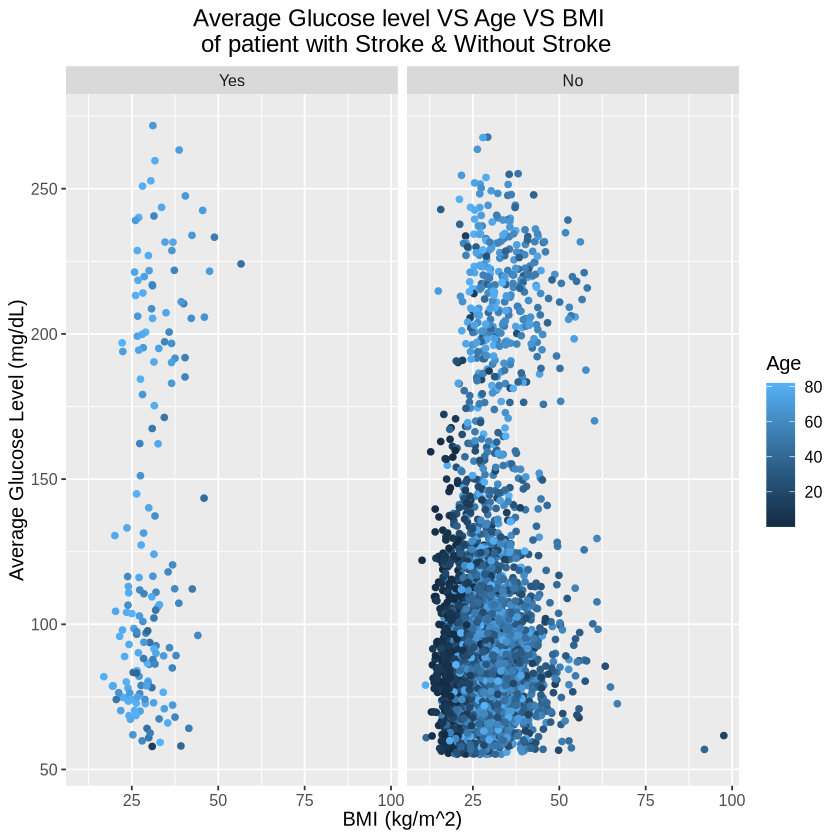

In [19]:
#set seed
set.seed(1)

download.file("https://raw.githubusercontent.com/Hannahli6/dsci_project/main/stroke_dataset.csv", 'stroke_dataset.csv')
stroke_data <- read_csv('stroke_dataset.csv')
# Convert 1 = "Yes", 0 = "No" for the stroke column
stroke_column <- stroke_data |>
            mutate(stroke = as.character(stroke)) |>
            select(stroke) 
stroke_column[stroke_column == 1] <- "Yes"
stroke_column[stroke_column == 0] <- "No"


stroke_data["stroke"] <- stroke_column |>
        mutate(stroke = as_factor(stroke))

stroke_data <- stroke_data |>
    select(stroke, age, avg_glucose_level, bmi)

#Split the data into training
stroke_data_split <- initial_split(stroke_data, prop = 0.75, strata = stroke)  
stroke_data_training <- training(stroke_data_split)  
stroke_data_testing <- testing(stroke_data_split)

#missing data
stroke_data_missing <- stroke_data_training|>
    filter(bmi == "N/A") |>
    summarize(missing_data = n())
stroke_data_missing

#summarize exploratory data
num_obs <- nrow(stroke_data_training) 
summarize_data <- stroke_data_training|>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    group_by(stroke) |>
    summarize(count = n(), percentage = n() / num_obs * 100 , avg_age = mean(age), avg_glucose_level= mean(avg_glucose_level), 
              avg_bmi = mean(bmi))
    
summarize_data 

stroke_plot <- stroke_data_training |>
    filter(bmi != "N/A")|>
    mutate(bmi = as.numeric(bmi)) |>
    ggplot(aes (x= bmi, y=avg_glucose_level, color= age)) +
    facet_grid(~stroke) +
    geom_point() +
    labs(x= "BMI (kg/m^2)", y = "Average Glucose Level (mg/dL)", colour = "Age" ,title = "Average Glucose level VS Age VS BMI \n of patient with Stroke & Without Stroke") +
    theme(text = element_text(size = 12)) +
    theme(plot.title = element_text(hjust = 0.5))
stroke_plot




## Method:


**Explain how you will conduct either your data analysis and which variables/columns you will use.**


We will conduct our data analysis using “avg_glucose_level”, “age” and “stroke”. We will be analyzing our data using the classification method. For analysis, we will use the training data to plot the average glucose level of a person against their age, and then label which people had a stroke. We will then use the k-nearest neighbors classification from tidy models to predict whether the points in our test data will have a stroke or not.


**Describe at least one way that you will visualize the results.**


One way we will visualize our results is by creating a scatter plot that plots the average glucose level of the person against their age. We will then color the points based on whether they had a stroke or not to look for trends or patterns.

## Expected outcomes and significance:


**What do you expect to find?**

The scatter plot suggested we are expected to find that there is a relationship between age, average glucose level, and the likelihood of having a stroke. And the anticipation is that elder people with higher average glucose levels are more likely to have a stroke.



**What impact could such findings have?**

They could have a significant impact on medicine, they may assist the doctor or other healthcare professionals in identifying patients who have a higher risk of having a stroke and implementing preventive measures to help them. This could potentially reduce the incidence and severity of having a stroke.



**What future questions could this lead to?**
1. How do other factors such as smoking status interact with age and glucose level to influence the possibility of stroke?

2. Based on the relationship between age, glucose level, and stroke risk, what is the most effective method to reduce stroke risk?